Name: Zhongya (Zack) Ge    ID: 28479745

Part A Data scraping: Scraping Data from The Numbers Movie Website:

In [1]:
#call requests package and BeautifulSoup package to get the html and extract data from html
import requests
from bs4 import BeautifulSoup
import concurrent.futures
#call csv package to save as csv file
import csv

In [2]:
def get_page_urls_array(link, maxpage):
    """put the base link, it will be glued with pagination from page 101 to maxpage, every time pagination increases 100"""
    pagination = 101
    results = []
    results.append(link)
    while pagination <= maxpage:
        following_link = link + '/' + str(pagination)
        results.append(following_link)
        pagination += 100
    return results

In [3]:
def get_html(page_url):
    """Put url, and get the html format"""
    response = requests.get(page_url)
    return response.text

In [4]:
def extract_ranking_from_html(raw_html):
    """use html getting from get_html(page_url), extract the information I want."""
    results = []
    parsed_html = BeautifulSoup(raw_html, "html.parser")
    rows = parsed_html.select('center table tr')
    ths = rows[0].select('th')
    column_0 = ths[0].get_text()
    column_1 = ths[1].get_text()
    column_2_1 = ths[2].get_text()
    column_2_2 = ths[2].get_text() + "_href"
    column_3 = ths[3].get_text()
    column_4 = ths[4].get_text()
    column_5 = ths[5].get_text()
    if column_num > 6:
        column_6 = ths[6].get_text()

    for row in rows:
        tds = row.select('td')
        if (len(tds) > 0):
            result = {}
            result[column_0] = tds[0].get_text()
            result[column_1] = tds[1].get_text()
            result[column_2_1] = tds[2].get_text()
            result[column_2_2] = tds[2].find("a")['href']
            result[column_3] = tds[3].get_text()
            result[column_4] = tds[4].get_text()
            result[column_5] = tds[5].get_text()
            if column_num > 6:
                result[column_6] = tds[6].get_text()      
            results.append(result)
           
    print('got ' + str(len(results)) + ' results')
    return results

In [5]:
def get_BoxOffice_ranking_parallel(urls, column_num):
    """use urls getting from get_page_urls_array(link, maxpage) function, and then put column_num to pend if 6 columns for this section are enough or not.Open 500 webs each time.  """
    results = []
    with concurrent.futures.ThreadPoolExecutor(max_workers = 500) as executor:

        future_to_url = {executor.submit(get_html, url): url for url in urls}
        for future in concurrent.futures.as_completed(future_to_url):
            url = future_to_url[future]
            try:
                data = future.result()
                results.extend(extract_ranking_from_html(data))
                print ('total have ' + str(len(results)) + ' results')
            except Exception as exc:
                print('%r generated an exception: %s' % (url, exc))
    return results


In [6]:
def get_csv_header(dict_list):
    """Create csv file column header by using dict list"""
    header= list(dict_list[0].keys())
    for item in dict_list:
        for key in item.keys():
            if key not in header:
                header.append(key)
    return header


def create_csv(filename, dict_list, header):
    #save the dict_list as csv file, and use header from get_csv_header(dict_list) funciton as header. 
    f = open(filename,'w',encoding='utf-8')
    with f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writeheader()
        for i in range(len(dict_list)):
            writer.writerow(dict_list[i])
    f.close()

Call functions: Scraping Data from Boxoffice ranking pages, from here I get movies' ranking, names, boxoffice, etc.

In [7]:
Boxoffice_first_link = "https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time"#use boxoffice first page as base link.
total_pages_BO = 16901#total page number is 16901
all_Boxoffice_links = get_page_urls_array(Boxoffice_first_link, total_pages_BO)#get all links of boxoffice
column_num = 7#7 columns' information to be extracted. 
boxOffice_result = get_BoxOffice_ranking_parallel(all_Boxoffice_links, column_num)#call function get_BoxOffice_ranking_parallel(), inside wen put links and column_num
print(len(boxOffice_result))

#Save the data I get into CSV
boxoffice_csv_header=get_csv_header(boxOffice_result)
create_csv("Boxoffice_Metadata.csv", boxOffice_result, boxoffice_csv_header)

'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/16101' generated an exception: list index out of range
'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/13801' generated an exception: list index out of range
'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/2501' generated an exception: list index out of range
'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/10701' generated an exception: list index out of range
'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/11601' generated an exception: list index out of range
'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/5401' generated an exception: list index out of range
'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/15401' generated an exception: list index out of range
'

Call functions: Scraping Data from Budget Information pages, from here I get movies' Budget, and boxoffice.

In [8]:
Budget_first_link = "https://www.the-numbers.com/movie/budgets/all"#use budget first page as base link. 
total_pages_BG = 6065 #total page number is 6065
all_Budget_links = get_page_urls_array(Budget_first_link,total_pages_BG)#get all links of budgets
column_num = 6 #6 columns' information to be extracted. 
budget_result = get_BoxOffice_ranking_parallel(all_Budget_links, column_num)#call function get_BoxOffice_ranking_parallel(), inside wen put links and column_num
print(len(budget_result))

#Save the data I get into CSV
budget_csv_header=get_csv_header(budget_result)
create_csv("Budget_Metadata.csv", budget_result, budget_csv_header)

got 100 results
total have 100 results
got 100 results
total have 200 results
got 100 results
total have 300 results
got 100 results
total have 400 results
got 100 results
total have 500 results
got 100 results
total have 600 results
got 100 results
total have 700 results
got 100 results
total have 800 results
got 100 results
total have 900 results
got 100 results
total have 1000 results
got 100 results
total have 1100 results
got 100 results
total have 1200 results
got 100 results
total have 1300 results
got 100 results
total have 1400 results
got 100 results
total have 1500 results
got 100 results
total have 1600 results
got 100 results
total have 1700 results
got 100 results
total have 1800 results
got 100 results
total have 1900 results
got 100 results
total have 2000 results
got 100 results
total have 2100 results
got 100 results
total have 2200 results
got 100 results
total have 2300 results
got 65 results
total have 2365 results
got 100 results
total have 2465 results
got 100 re

Filter out the movies released before 2000, becasue the information about these movies might be incomplete and accurate.

In [9]:
def get_movie_after2000(boxOffice_result):
    """To filter out the movies released before 2000, based on Year column."""
    boxOffice_after2000 = []
    for information in boxOffice_result:
        if int(information["Year"]) >= 2000:
            boxOffice_after2000.append(information)
    return boxOffice_after2000

Call functions: to filter out movies released before 2000, and save into csv file

In [10]:
movie_after2000 = get_movie_after2000(boxOffice_result)
print(len(movie_after2000))

#Save the movies released after 2000 into CSV
movies_after2000_csv_header=get_csv_header(movie_after2000)
create_csv("ranking_after2000.csv", movie_after2000, movies_after2000_csv_header)

9243


Scraping Data from Information Details pages, from here I get Genres, Language, duration, boxoffice information by country, etc

In [11]:
def get_genres_box_links(boxOffice_result):
    """glue the base link "www.the-numbers.com" with each href from ranking file, which will be the new link for extracting genres, lanuages, durations. """
    genres_links = []
    for infor in boxOffice_result:
        link = "https://www.the-numbers.com" + infor["Movie_href"]
        genres_links.append(link)
    return genres_links

In [12]:
def get_summary(parsed_html, results, url):
    """extract data such as genres, duration, releasing date, movie language, keywords, boxoffice by country, etc."""
    divs = parsed_html.select('#international div')
    if len(divs) > 0:
        rows = divs[0].find_all("tr")
    else:
        return 
    result = {}
    result["href"] = url.replace("https://www.the-numbers.com","")
    if len(rows) > 0:
        for row in rows:
            tds = row.select('td')
            if (len(tds) > 3):
                country_name = tds[0].get_text()
                result[country_name] = tds[6].get_text()
    
    tables = parsed_html.select('#summary table')
    if len(tables) > 0:
        for table in tables:
            trs = table.select('tr')
            if len(trs) > 10:
                for tr in trs:
                    tds = tr.find_all("td")
                    if len(tds) == 2:
                        result[tds[0].get_text()] = tds[1].get_text()
        results.append(result)
        print(len(results), "- ",end = '')
        

In [13]:
def get_Genres_time_language(genres_links):
    """use urls getting from get_genres_box_links() function, and then insides it will call get_html() function and get_summary() funciton. Open 500 webs each time. """
    results = []
    """use page urls - loop url in it - call get_html function to get the html for each page, and then extract the wated data from the html"""
    with concurrent.futures.ThreadPoolExecutor(max_workers = 500) as executor:
        future_to_url = {executor.submit(get_html, url): url for url in genres_links}
        for future in concurrent.futures.as_completed(future_to_url):
            url = future_to_url[future]
            try:
                raw_html = future.result()
                parsed_html = BeautifulSoup(raw_html, "html.parser")
                get_summary(parsed_html, results, url)
            except Exception as exc:
                print('%r generated an exception: %s' % (url, exc))
    return results

Call functions: to scrape genres and other information

In [14]:
genres_links = get_genres_box_links(movie_after2000)#use base url and glue with movie_href, result is a list with all links 
genres_and_overseas_info = get_Genres_time_language(genres_links)#use links get genres, duration, releasing date, movie language, keywords, etc.
print(len(genres_links))  #length of links 
print(len(genres_and_overseas_info))  #length of results based of links

#Save this data into csv file 
final_csv_header=get_csv_header(genres_and_overseas_info)
create_csv("Detail_infor.csv", genres_and_overseas_info, final_csv_header)

1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - 154 - 155 - 156 - 157 - 158 - 159 - 160 - 161 - 162 - 163 - 164 - 165 - 166 - 167 - 168 - 169 - 170 - 171 - 172 - 173 - 174 - 175 - 176 - 177 - 178 - 179 - 180 - 181 - 182 - 183 - 184 - 185 



Part B: Data Transformation

Existing CSV Files: "Boxoffice_Metadata.csv", "Budget_Metadata.csv", "ranking_after2000.csv", "Detail_infor.csv".

In [118]:
# Use these library to tidy up data and transform data. 
import pandas as pd
import numpy as np
import re

In [119]:
def import_file(filename):
    """import files and fill up na by 0."""
    infile = pd.read_csv(filename)
    infile = infile.fillna(0)
    print(infile.columns.values)
    print(len(infile))
    return infile

In [120]:
def delete_and_convert_to_int(df_name, column_names_list, sign):
    """deleth certain sign such as $, and convert to int"""
    for column_name in column_names_list:
        df_name[column_name] = df_name[column_name].str.replace('$', '')
        #df_name[column_name] = pd.to_numeric(df_name[column_name], errors='coerce')
        df_name[column_name] = df_name[column_name].str.replace(',','').astype(int)
    return df_name

In [121]:
def get_joined_file_on_href(left_file, right_file):
    """Firstly, if the column name is href, transfer it to Movie_href, make sure the key have the same name. And then right file joins into left file if the key matches."""
    left_file.rename(columns={'href':'Movie_href'}, inplace=True)
    right_file.rename(columns={'href':'Movie_href'}, inplace=True)
    joined_file = pd.merge(left_file,  
                     right_file,  
                     on ='Movie_href',  
                     how ='left') 
    return joined_file

In [122]:
def select_columns(columns_name_list):
    comparison_file = joined_file2[columns_name_list]
    print("Total Rows:",len(comparison_file))
    print(comparison_file.columns.values)
    print(comparison_file.dtypes)
    return comparison_file

In [123]:
def divide_number_and_add_column_compare(comparison_file):
    comparison_file = comparison_file.dropna()
    comparison_file['Compare'] = np.where(comparison_file['ProductionBudget'] * 2.0 > comparison_file['WorldwideGross'], "Low", "high")
    print(comparison_file['Compare'].value_counts())
    comparison_file['ProductionBudget'] *= 1/1000000
    comparison_file['WorldwideGross'] *= 1/1000000
    comparison_file = comparison_file.rename(columns={'Genre:':'Genre'}, inplace=False)
    return comparison_file

In [124]:
#Import 4 files getting from Part A
Boxoffice_Metadata_filename = 'Boxoffice_Metadata.csv'
Boxoffice_df = import_file(Boxoffice_Metadata_filename)

Budget_Metadata_filename = 'Budget_Metadata.csv'
budget_df = import_file(Budget_Metadata_filename)

ranking_after2000_filename = 'ranking_after2000.csv'
movie_after2000_df = import_file(ranking_after2000_filename)

Detail_info_filename = 'Detail_infor.csv'
detail_info_df = import_file(Detail_info_filename)

['Rank' 'Year' 'Movie' 'Movie_href' 'Distributor' 'DomesticBox Office'
 'InternationalBox Office' 'WorldwideBox Office']
14100
['\xa0' 'ReleaseDate' 'Movie' 'Movie_href' 'ProductionBudget'
 'DomesticGross' 'WorldwideGross']
6065
['Rank' 'Year' 'Movie' 'Movie_href' 'Distributor' 'DomesticBox Office'
 'InternationalBox Office' 'WorldwideBox Office']
9243
['href' 'Domestic Releases:' 'MPAA\xa0Rating:' 'Running Time:'
 'Franchise:' 'Comparisons:' 'Keywords:' 'Source:' 'Genre:'
 'Production\xa0Method:' 'Creative\xa0Type:' 'Production Companies:'
 'Production Countries:' 'Languages:' 'Australia*'
 'International Releases:' 'Video\xa0Release:' 'Lithuania' 'Netherlands'
 'New Zealand' 'South Korea' 'United Kingdom' 'Egypt' 'Argentina'
 'Austria' 'Belgium' 'Bolivia' 'Brazil' 'Bulgaria' 'Chile' 'Colombia'
 'Croatia' 'Czech Republic' 'Denmark' 'Ecuador' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Israel' 'Italy' 'Jordan' 'Kenya' 'Latvia' 

/opt/miniconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (47,77,79,80,81,82,84,85,86,87,92,94,95,96,97,98,100,101,102,103,104,105,108,111,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [125]:
#remove $ sign and convert 'ProductionBudget', 'DomesticGross', 'WorldwideGross' in budget_df to int
df_name = budget_df
column_names_list = ['ProductionBudget', 'DomesticGross', 'WorldwideGross']
sign = "$"
budget_df = delete_and_convert_to_int(df_name, column_names_list, sign)

In [126]:
#remove $ sign and convert 'DomesticBox Office', 'InternationalBox Office', 'WorldwideBox Office' in movie_after2000_df to int
df_name = movie_after2000_df
column_names_list = ['WorldwideBox Office']
sign = "$"
movie_after2000_df = delete_and_convert_to_int(df_name, column_names_list, sign)

In [127]:
#left join budget_df, movie_after2000_df, detail_info_df by href together. 
joined_file1 = get_joined_file_on_href(budget_df, movie_after2000_df)
joined_file2 = get_joined_file_on_href(joined_file1, detail_info_df)

In [128]:
#select needed column 
columns_name_list = ['Year', 'Genre:', 'ProductionBudget', "WorldwideGross"]
comparison_file = select_columns(columns_name_list)

Total Rows: 6065
['Year' 'Genre:' 'ProductionBudget' 'WorldwideGross']
Year                float64
Genre:               object
ProductionBudget      int64
WorldwideGross        int64
dtype: object


In [147]:
comparison_file = divide_number_and_add_column_compare(comparison_file)

Low     1366
high    1290
Name: Compare, dtype: int64


Part C: Data Analysis

1. Linear Regression

In [144]:
#call these function will be needed for linear regression.
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [145]:
def fit_LR_plot(comparison_file):
    """Fit a linear regression and plot the table, we can select certain genre type to fit"""
    comparison_file = comparison_file.dropna()
    X = comparison_file.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = comparison_file.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

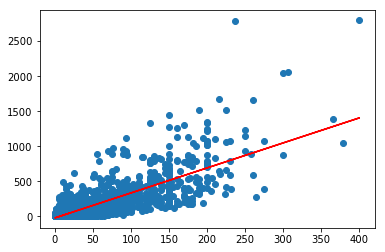

In [146]:
fit_LR_plot(comparison_file)

2. Calculate mean for ProductionBudget and WorldwideGross By Year and Genres

In [133]:
def get_mean_and_sum_by_column(comparison_file, column_name):
    """print means and sums for certain column name"""
    print("Sum:")
    sum_result = comparison_file.groupby(column_name).sum()
    print(sum_result)
    
    print("Mean:")
    mean_result = comparison_file.groupby(column_name).mean()
    print(mean_result)

In [134]:
genre_mean = get_mean_and_sum_by_column(comparison_file, "Genre")

Sum:
                          Year  ProductionBudget  WorldwideGross
Genre                                                           
0                     845670.0       5465.058000     6434.948403
Action                603133.0      25979.062938    85226.715243
Adventure             649375.0      30878.700000   103841.137201
Black Comedy           62324.0        693.380000     1640.209080
Comedy                741394.0      10071.200000    27180.773128
Concert/Performance    12064.0         59.250000      199.682027
Documentary            88457.0        295.485000      899.297440
Drama                1208415.0      13677.460600    34654.262079
Horror                317820.0       3068.516000    13656.150513
Musical                58329.0       1900.600000     8700.957227
Romantic Comedy       210907.0       2961.160000     8847.951461
Thriller/Suspense     508741.0       8164.198106    20677.633549
Western                30136.0        546.900000      833.844682
Mean:
              

In [143]:
Year_mean = get_mean_and_sum_by_column(comparison_file, "Year")

Sum:
        ProductionBudget  WorldwideGross
Year                                    
2000.0       3748.438044     7746.827907
2001.0       3723.520000     8870.521543
2002.0       4007.745000     9711.183175
2003.0       4000.500000    10978.702453
2004.0       4656.347000    13727.426287
2005.0       5183.680000    12621.213359
2006.0       4930.372000    12404.846336
2007.0       4721.680000    11973.847702
2008.0       5693.099000    14917.522333
2009.0       4850.710000    14440.268970
2010.0       5806.753000    14364.362079
2011.0       6418.525000    18769.211130
2012.0       5444.445000    18524.434973
2013.0       5971.000000    19392.109869
2014.0       5161.240000    17087.144638
2015.0       6065.245600    20246.465154
2016.0       6359.175000    21424.640594
2017.0       5575.450000    21604.071392
2018.0       4904.300000    19288.156829
2019.0       5488.100000    22730.016506
2020.0       1050.646000     1970.588804
Mean:
        ProductionBudget  WorldwideGross
Year 

3. Plot pie graph for Boxoffice and Budget share by Genres

In [137]:
import matplotlib.pyplot as plt

def plot_pie_chart(comparison_file, ProductionBudget_or_WorldwideGross):
    """by inputting dataframe and choosing budget column or box office column, we can plot a pie chart"""
    genres_kinds = comparison_file.Genre.unique()
    comparison_file = comparison_file.drop(comparison_file[comparison_file.Genre == 0].index)
    genres_kinds = comparison_file.Genre.unique()
    items = ['Adventure', 'Thriller/Suspense', 'Comedy', 'Action', 'Drama', 'Horror','Western', 'Romantic Comedy', 'Black Comedy', 'Musical', 'Documentary','Concert/Performance']
    genre_sum = comparison_file.groupby("Genre")[ProductionBudget_or_WorldwideGross].sum()
    budget_list = genre_sum.values.tolist()
    proportions = budget_list
    colors = ['r', 'g', 'y', 'b', 'y', 'g', 'r', 'g', 'b', 'r','g', 'y']
    plt.pie(proportions, labels=items, colors=colors,
            startangle=20, shadow=True, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
            radius=1.2, autopct='%1.1f%%')
    if ProductionBudget_or_WorldwideGross == "WorldwideGross":
        plt.title('BoxOffice share of Movies by Genres')
    else: 
        plt.title('Budget share of Movies by Genres')
    plt.show()

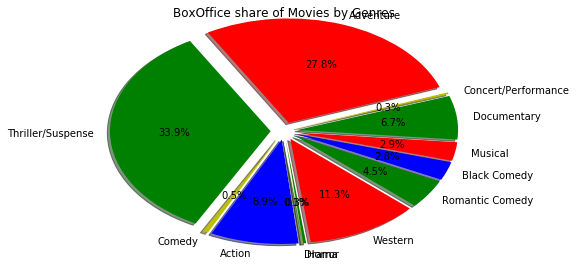

In [138]:
plot_pie_chart(comparison_file, "WorldwideGross")

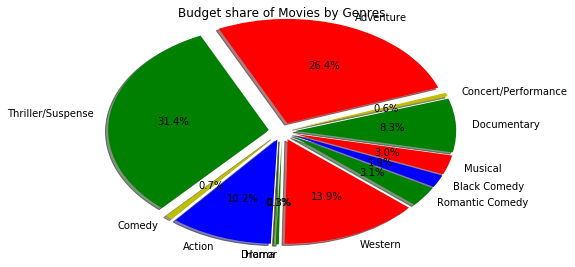

In [139]:
plot_pie_chart(comparison_file, "ProductionBudget")

4. Plot bar chart for The Number of Movies by Genres and The Number of Movies by Years

In [140]:
def plot_bar_chart(comparison_file, column_name):
    """by inputting dataframe and Genre or Year column, we can plot a bar chart"""
    comparison_file = comparison_file.drop(comparison_file[comparison_file.Genre == 0].index)
    numbers = comparison_file[column_name].value_counts()
    paths = comparison_file[column_name].value_counts().keys()
    if column_name != "Year":
        plt.title("The Number of Movies by Genres")
    else:
        plt.title("The Number of Movies by Years")
    plt.ylabel("Number of Movies")
    plt.xlabel("Genres")
    plt.xticks(rotation=90)
    plt.bar(paths, numbers, color='mcbkyrg')

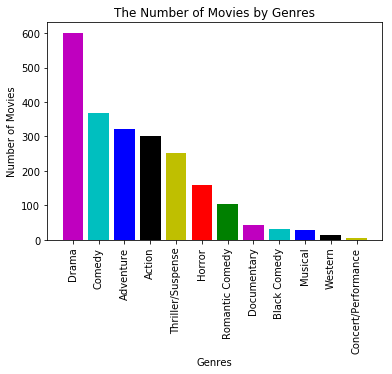

In [141]:
plot_bar_chart(comparison_file, "Genre")

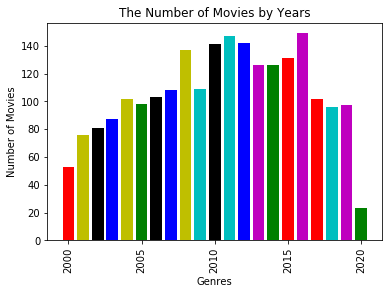

In [142]:
plot_bar_chart(comparison_file, "Year")